# Fake News Detection

The [Fake News Classification dataset](https://www.kaggle.com/ruchi798/source-based-news-classification) from Kaggle is being used here.


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline

## The Data

In [2]:
news_df = pd.read_csv('news_articles.csv')

In [3]:
news_df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
news_df.tail()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0
2095,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [6]:
news_df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

## Data Cleaning

In [7]:
news_df[news_df['language'].isnull() == True]

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2095,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let us drop this row as the data is missing for many features in this**

In [8]:
news_df.drop(index = 2095, inplace = True)

In [9]:
news_df.isnull().sum()

author                      0
published                   0
title                       0
text                       45
language                    0
site_url                    0
main_img_url                0
type                        0
label                       0
title_without_stopwords     1
text_without_stopwords     49
hasImage                    0
dtype: int64

**Let us next check the missing values for title_without_stopwords**

In [10]:
news_df[news_df['title_without_stopwords'].isnull() == True]

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
374,Daniel Haiphong,2016-11-17T02:00:00.000+02:00,won now what,the syrian army and hezbollah resistance force...,english,ahtribune.com,http://ahtribune.com/images/media/Donald_Trump...,bs,Fake,NaN,syrian army hezbollah resistance forces contin...,1.0


**Let us drop this row**

In [11]:
news_df.drop(index = 374, inplace = True)

In [12]:
news_df.isnull().sum()

author                      0
published                   0
title                       0
text                       45
language                    0
site_url                    0
main_img_url                0
type                        0
label                       0
title_without_stopwords     0
text_without_stopwords     49
hasImage                    0
dtype: int64

**Now let us look at the null values in text**

In [13]:
news_df[news_df['text'].isnull() == True].head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2050,-NO AUTHOR-,2016-10-27T03:19:40.578+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,No Image URL,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0
2051,-NO AUTHOR-,2016-10-27T03:32:23.580+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/meteor_russia...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2052,Leo Hohmann,2016-10-27T03:32:35.039+03:00,wikileaks bombshells on hillary you need to know,NaN,english,wnd.com,http://mobile.wnd.com/files/2013/07/ballot-box...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2053,-NO AUTHOR-,2016-10-27T03:32:37.291+03:00,fascinated with sex,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/Saeed_Toos...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2054,-NO AUTHOR-,2016-10-27T04:01:58.682+03:00,meteor space junk rocket mysterious flash hits...,NaN,english,wnd.com,http://www.wnd.com/files/2013/07/ballot-box-vo...,bias,Real,men cry rape irans top quran reader,NaN,1.0


In [14]:
news_df.shape

(2094, 12)

**We drop the rows where text is missing**

In [15]:
news_df.dropna(subset=['text'],inplace=True)

In [16]:
news_df.shape

(2049, 12)

**To fill the column for text_without_stopwords we need to import nltk stopwords**

In [17]:
import nltk

In [18]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


**The corpus for stopwords is already downloaded**

In [19]:
from nltk.corpus import stopwords

In [20]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2049
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2049 non-null   object 
 1   published                2049 non-null   object 
 2   title                    2049 non-null   object 
 3   text                     2049 non-null   object 
 4   language                 2049 non-null   object 
 5   site_url                 2049 non-null   object 
 6   main_img_url             2049 non-null   object 
 7   type                     2049 non-null   object 
 8   label                    2049 non-null   object 
 9   title_without_stopwords  2049 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2049 non-null   float64
dtypes: float64(1), object(11)
memory usage: 208.1+ KB


In [21]:
news_df.loc[(news_df['text_without_stopwords'].isnull()==True), 'text_without_stopwords']

2046    NaN
2047    NaN
2048    NaN
2049    NaN
Name: text_without_stopwords, dtype: object

**We now fill in the missing data**

In [22]:
news_df.loc[(news_df['text_without_stopwords'].isnull()==True), 'text_without_stopwords'] = news_df.loc[(news_df['text_without_stopwords'].isnull()==True), 'text'].apply(lambda text: ''.join([word for word in text if word.lower() not in stopwords.words('english')]))

In [23]:
news_df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

In [24]:
news_df.shape

(2049, 12)

## Exploratory Data Analysis

In [25]:
news_df.describe(include = 'all')

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
count,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049,2049.000000
unique,486,1960,1757,1940,5,68,1184,8,2,1753,1940,NaN
top,No Author,2016-10-30T13:00:00.000+02:00,no title,notify me of followup comments by email notify...,english,presstv.ir,No Image URL,bs,Fake,title,notify followup comments email notify new post...,NaN
freq,505,8,186,6,1971,100,465,598,1291,186,6,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772572
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419274
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


We can see that the author column has many rows which does not appear to be accurate. We might drop the column.

In [26]:
news_df.groupby('author').describe()

hasImage            \
                                                      count      mean   
author                                                                  
# 1 NWO Hatr                                            3.0  1.000000   
-NO AUTHOR-                                            24.0  0.666667   
4 Goals For The Neomasculinity Movement During ...      1.0  0.000000   
?????? ???? ???? ?????????                              1.0  1.000000   
A. Griffee                                              2.0  1.000000   
...                                                     ...       ...   
watchmannonthewall                                      1.0  1.000000   
willz                                                   1.0  1.000000   
wmw_admin                                               1.0  0.000000   
wtromp@operamail.com (WT)                               2.0  1.000000   
xuenchen                                                3.0  1.000000   

                                                                             \
                                                         std  min  25%  50%   
author                                                                        
# 1 NWO Hatr                                        0.000000  1.0  1.0  1.0   
-NO AUTHOR-                                         0.481543  0.0  0.0  1.0   
4 Goals For The Neomasculinity Movement During ...       NaN  0.0  0.0  0.0   
?????? ???? ???? ?????????                               NaN  1.0  1.0  1.0   
A. Griffee                                          0.000000  1.0  1.0  1.0   
...                                                      ...  ...  ...  ...   
watchmannonthewall                                       NaN  1.0  1.0  1.0   
willz                                                    NaN  1.0  1.0  1.0   
wmw_admin                                                NaN  0.0  0.0  0.0   
wtromp@operamail.com (WT)                           0.000000  1.0  1.0  1.0   
xuenchen                                            0.000000  1.0  1.0  1.0   

                                                              
                                                    75%  max  
author                                                        
# 1 NWO Hatr                                        1.0  1.0  
-NO AUTHOR-                                         1.0  1.0  
4 Goals For The Neomasculinity Movement During ...  0.0  0.0  
?????? ???? ???? ?????????                          1.0  1.0  
A. Griffee                                          1.0  1.0  
...                                                 ...  ...  
watchmannonthewall                                  1.0  1.0  
willz                                               1.0  1.0  
wmw_admin                                           0.0  0.0  
wtromp@operamail.com (WT)                           1.0  1.0  
xuenchen                                            1.0  1.0  

[486 rows x 8 columns]

In [27]:
news_df.groupby('site_url').describe()

hasImage                                             
                          count      mean       std  min  25%  50%  75%  max
site_url                                                                    
100percentfedup.com        33.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
21stcenturywire.com        24.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
abcnews.com.co              2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
abeldanger.net             82.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
abovetopsecret.com         53.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
...                         ...       ...       ...  ...  ...  ...  ...  ...
washingtonsblog.com         3.0  0.666667  0.577350  0.0  0.5  1.0  1.0  1.0
westernjournalism.com     100.0  0.980000  0.140705  0.0  1.0  1.0  1.0  1.0
whatreallyhappened.com     10.0  0.500000  0.527046  0.0  0.0  0.5  1.0  1.0
whydontyoutrythis.com       2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
wnd.com                    55.0  0.654545  0.479899  0.0  0.0  1.0  1.0  1.0

[68 rows x 8 columns]

**We can observe that there are 68 different websites in the given data**

In [28]:
news_df.groupby('language').describe()

hasImage                                               
            count      mean       std  min   25%  50%   75%  max
language                                                        
english    1971.0  0.764587  0.424365  0.0  1.00  1.0  1.00  1.0
french        2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
german       72.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
ignore        3.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
spanish       1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0

**Here we can see that the maximum news is in english**

In [29]:
news_df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [30]:
news_df['label'].unique()

array(['Real', 'Fake'], dtype=object)

In [31]:
news_df[news_df['label'] == 'Real'].head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [32]:
news_df[news_df['label'] == 'Fake'].head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
33,No Author,2016-10-27T02:24:00.000+03:00,intl community still financing protecting terr...,st century wire says \nwire reported on friday...,english,21stcenturywire.com,http://21stcenturywire.com/wp-content/uploads/...,conspiracy,Fake,intl community still financing protecting terr...,st century wire says wire reported friday fbis...,1.0
34,No Author,2016-10-29T16:20:00.000+03:00,fbi director comeys leaked memo explains why h...,in a stunning turn of events days before the ...,english,21stcenturywire.com,http://21stcenturywire.com/wp-content/uploads/...,conspiracy,Fake,fbi director comeys leaked memo explains hes r...,stunning turn events days presidential electio...,1.0
35,Shawn Helton,2016-10-29T04:22:00.000+03:00,fbi redux whats behind new probe into hillary ...,a tidal wave of revelations is pouring out of ...,english,21stcenturywire.com,http://21stcenturywire.com/wp-content/uploads/...,conspiracy,Fake,fbi redux whats behind new probe hillary clint...,tidal wave revelations pouring clinton campaig...,1.0
36,Mike Rivero,2016-11-02T01:43:00.000+02:00,party corruption clinton campaign directly tie...,november by wire comments \npatrick henning...,english,21stcenturywire.com,http://i1.wp.com/21stcenturywire.com/wp-conten...,conspiracy,Fake,party corruption clinton campaign directly tie...,november wire comments patrick henningsen st c...,1.0
37,No Author,2016-11-01T16:48:00.000+02:00,hillarys russian hack hoax the biggest lie of ...,november by shawn helton comment \nshawn he...,english,21stcenturywire.com,http://i0.wp.com/21stcenturywire.com/wp-conten...,conspiracy,Fake,hillarys russian hack hoax biggest lie electio...,november shawn helton comment shawn helton st ...,1.0


In [33]:
news_df[news_df['label'] == 'Real'].shape

(758, 12)

In [34]:
news_df[news_df['label'] == 'Fake'].shape

(1291, 12)

**We can see that there are more rows which are fake than real news**

In [35]:
news_df.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1291.0  0.736638  0.440628  0.0  0.0  1.0  1.0  1.0
Real     758.0  0.833773  0.372530  0.0  1.0  1.0  1.0  1.0

**Let us look at the type column**

In [36]:
news_df.groupby(['label','type']).describe()

hasImage                                             
                    count      mean       std  min  25%  50%  75%  max
label type                                                            
Fake  bs            598.0  0.745819  0.435764  0.0  0.0  1.0  1.0  1.0
      conspiracy    430.0  0.669767  0.470845  0.0  0.0  1.0  1.0  1.0
      fake           15.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
      junksci       102.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
      satire        146.0  0.684932  0.466142  0.0  0.0  1.0  1.0  1.0
Real  bias          393.0  0.933842  0.248874  0.0  1.0  1.0  1.0  1.0
      hate          244.0  0.590164  0.492814  0.0  0.0  1.0  1.0  1.0
      state         121.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

**We can see that each of the Real or Fake news is categorised into different types**

**Let us look into the length of the title and the text in the data**

<AxesSubplot:ylabel='Frequency'>

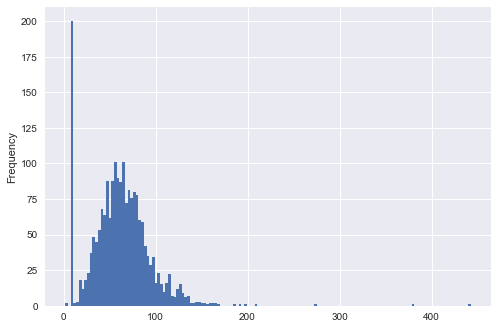

In [37]:
plt.style.use('seaborn')
news_df['title'].apply(len).plot(kind='hist', bins=150)

<AxesSubplot:ylabel='Frequency'>

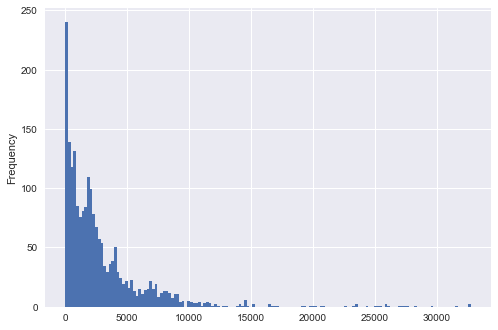

In [38]:
news_df['text'].apply(len).plot(kind='hist', bins=150)

In [39]:
news_df['title'].apply(len).describe()

count    2049.000000
mean       61.637872
std        32.839656
min         2.000000
25%        43.000000
50%        61.000000
75%        79.000000
max       443.000000
Name: title, dtype: float64

In [40]:
news_df['text'].apply(len).describe()

count     2049.000000
mean      2964.821864
std       3771.305237
min          4.000000
25%        689.000000
50%       1882.000000
75%       3845.000000
max      32758.000000
Name: text, dtype: float64

## Text Preprocessing

In [41]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Removes all punctuation
    2. Removes all stopwords
    3. Returns a list of the cleaned text 
    """
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string. 
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Vectorization

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
feature_cols = news_df.columns
feature_cols

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

**CountVectorizer on the title feature**

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(news_df['title'])

In [45]:
print(len(bow_transformer.vocabulary_))

5781


In [46]:
title_bow = bow_transformer.transform(news_df['title'])

In [47]:
print('Shape of sparse matrix: ', title_bow.shape) 
print('Number of non zero occurences: ', title_bow.nnz)

Shape of sparse matrix:  (2049, 5781)
Number of non zero occurences:  14701


In [48]:
sparsity = (100.0 * title_bow.nnz / (title_bow.shape[0] * title_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [49]:
print('sparsity: {}'.format(sparsity))

sparsity: 0.12410862091861316


**CountVectorizer on the text feature**

In [50]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(news_df['text'])

In [51]:
print(len(bow_transformer.vocabulary_))

47154


In [52]:
text_bow = bow_transformer.transform(news_df['text'])

In [53]:
print('Shape of sparse matrix: ', text_bow.shape) 
print('Number of non zero occurences: ', text_bow.nnz)

Shape of sparse matrix:  (2049, 47154)
Number of non zero occurences:  389191


In [54]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [55]:
print('sparsity: {}'.format(sparsity))

sparsity: 0.40281189907370374


## TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
title_tfidf_transformer = TfidfTransformer().fit(title_bow) 
#Here title_bow is a sparse matrix created above using bow_transformer

In [59]:
title_tfidf = title_tfidf_transformer.transform(title_bow)
print(title_tfidf.shape)

(2049, 5781)


In [60]:
text_tfidf_transformer = TfidfTransformer().fit(text_bow) 
#Here title_bow is a sparse matrix created above using bow_transformer

In [61]:
text_tfidf = text_tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(2049, 47154)


## Train Test Split

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(news_df['title'], news_df['label'], test_size=0.2)

In [65]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(news_df['text'], news_df['label'], test_size=0.2)

## Creating a Data Pipeline

In [66]:
from sklearn.pipeline import Pipeline

In [67]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [68]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000014C5F87D310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [69]:
pipeline_predictions = pipeline.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, pipeline_predictions))

              precision    recall  f1-score   support

        Fake       0.69      0.94      0.79       257
        Real       0.74      0.27      0.40       153

    accuracy                           0.69       410
   macro avg       0.71      0.61      0.60       410
weighted avg       0.70      0.69      0.65       410

